# full chain of cross-section results - for studying the cross-section with different samples or different cut values

In [1]:
import sys; sys.path.insert(0, '../../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [13]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/'

# full chain of cross-section extraction - nominal

In [3]:
versions['Overlay']='prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['beam on']='prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off']='prod_reco_optfilter_extbnb_v12_mcc8_dev'
versions['overlay date']='2018_09_22'
versions['data date']='2018_08_16'

extra_name=''
minPEcut = 150
maxdYZcut = 200
delta_theta_12 = 55
r_max_RdQ_CC1p = 0.43
delta_Delta_phi = 35
Pt_max = 0.35
Chi2Proton_muCandidate_min = 80
Chi2Proton_pCandidate_max = 30
extract_Xsec_full_chain(extra_name='',debug=0,force_recalculated_weights=True
                            ,minPEcut = minPEcut,maxdYZcut = maxdYZcut
                            ,delta_theta_12 = delta_theta_12,r_max_RdQ_CC1p = r_max_RdQ_CC1p
                            ,delta_Delta_phi = delta_Delta_phi,Pt_max = Pt_max
                            ,Chi2Proton_muCandidate_min = Chi2Proton_muCandidate_min,Chi2Proton_pCandidate_max = Chi2Proton_pCandidate_max)

found selected overlay files from , loading them...
9538 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...
done loading samples...
no efficiency weights, computing them
done assiging efficiency weights weights.
already performed correction for phi~0 and saved the samples...
saved  12127 selected overlay events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_overlay.csv
saved  9538 selected CC1p events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_CC1p.csv
saved  462 selected beam_on events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_beam_on.csv
saved  15 selected beam_off events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_b

In [6]:
def Draw_Xsecs(do_corr_phi_0=True, debug=0, particle='mu',
               do_last_ctu_bin=False,
               do_P=True, do_cos_theta=True, do_phi=True,               
               extra_name="",residuals_ylim=[-2,2],residuals_yticks=[-1,0,1],residuals_ytitle=1.05):    
    infilename = Paths['1d Xsec'] + "P"+particle + "Xsecs_1D"+extra_name+".txt"
    print "drawing cross-section from",infilename
    with open(infilename, 'rb') as infile:#{
        Xsec_dicts = pickle.load(infile)
    #}
    if debug: pp.pprint(Xsec_dicts)
    for iXsec,(Xsec_title,do_draw_Xsecs) in enumerate(zip(Xsec_ctu_titles,[True,do_last_ctu_bin])):#{
        if do_draw_Xsecs==False: continue
        fig=plt.figure(figsize=(24,8))            
        Xsec_dict = Xsec_dicts[Xsec_title]
        for i,(observable,ivar,do_var) in enumerate(zip(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']                                                        
                                                                 ,[(1,4),(2,5),(3,6)]
                                                                 ,[do_P,do_cos_theta,do_phi])):#{
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)

            h = dict()
            h['Xsec'],h['Xsec err'] = Xsec_dict[observable],Xsec_dict[observable+' err']
            h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+observable], Xsec_dict['mc '+observable+' err']
            ax = fig.add_subplot(3,3,ivar)
            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
                h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]
                
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',label='data')
            ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay') 

            
            set_axes(ax,'',y_label=(r'$\frac{d\sigma}{d'+vlabel+'}$' 
                                        +(r'$\left[10^{-39} \frac{cm^{2}}{%s}\right]$'%units if units is not None 
                                          else r'$\left[10^{-39}cm^{2}\right]$'))
                         ,do_add_grid=True,remove_ticks_x=True,do_add_legend=True if 'Pmu_cos_theta' in var else False
                         ,ylim=(0,1.1*np.max(ax.get_ylim())))
            plt.title(Xsec_title, y=1.02,fontsize=25)
                    
            # residuals plot
            den, den_err = h['Xsec']-h['mc Xsec'],np.sqrt(np.square(h['Xsec err'])+np.square(h['mc Xsec err']))
            num, num_err = h['Xsec'],h['mc Xsec err']
            ratio = np.array([den[j]/(num[j] if np.abs(num[j])>0 else 1000) for j in range(len(num))])
            ax = fig.add_subplot(3,3,7+i)
            ratio_err = ratio*np.sqrt(np.square(den_err/den) + np.square(num_err/num))
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=ratio,yerr=ratio_err,fmt='o',markersize=0,color='black')
            chi2,ndf = chi2_two_data_curves(h1=h['Xsec'],h1err=h['Xsec err'],h2=h['mc Xsec'],h2err=h['mc Xsec err'],bins=bins,debug=0)
            set_axes(ax,xlabel,y_label=r'(data-mc)/data',do_add_grid=True,ylim=residuals_ylim,yticks=residuals_yticks)
            plt.plot([np.min(bins),np.max(bins)],[0,0],'--',color='royalblue')
            plt.title(r'$\chi^2/ndf=%.2f/%d$'%(chi2,ndf), fontsize=20,y=residuals_ytitle)
        #}     
        plt.tight_layout()
        plt.subplots_adjust(hspace=0.05)
    #} 

drawing cross-section from /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/PpXsecs_1D.txt


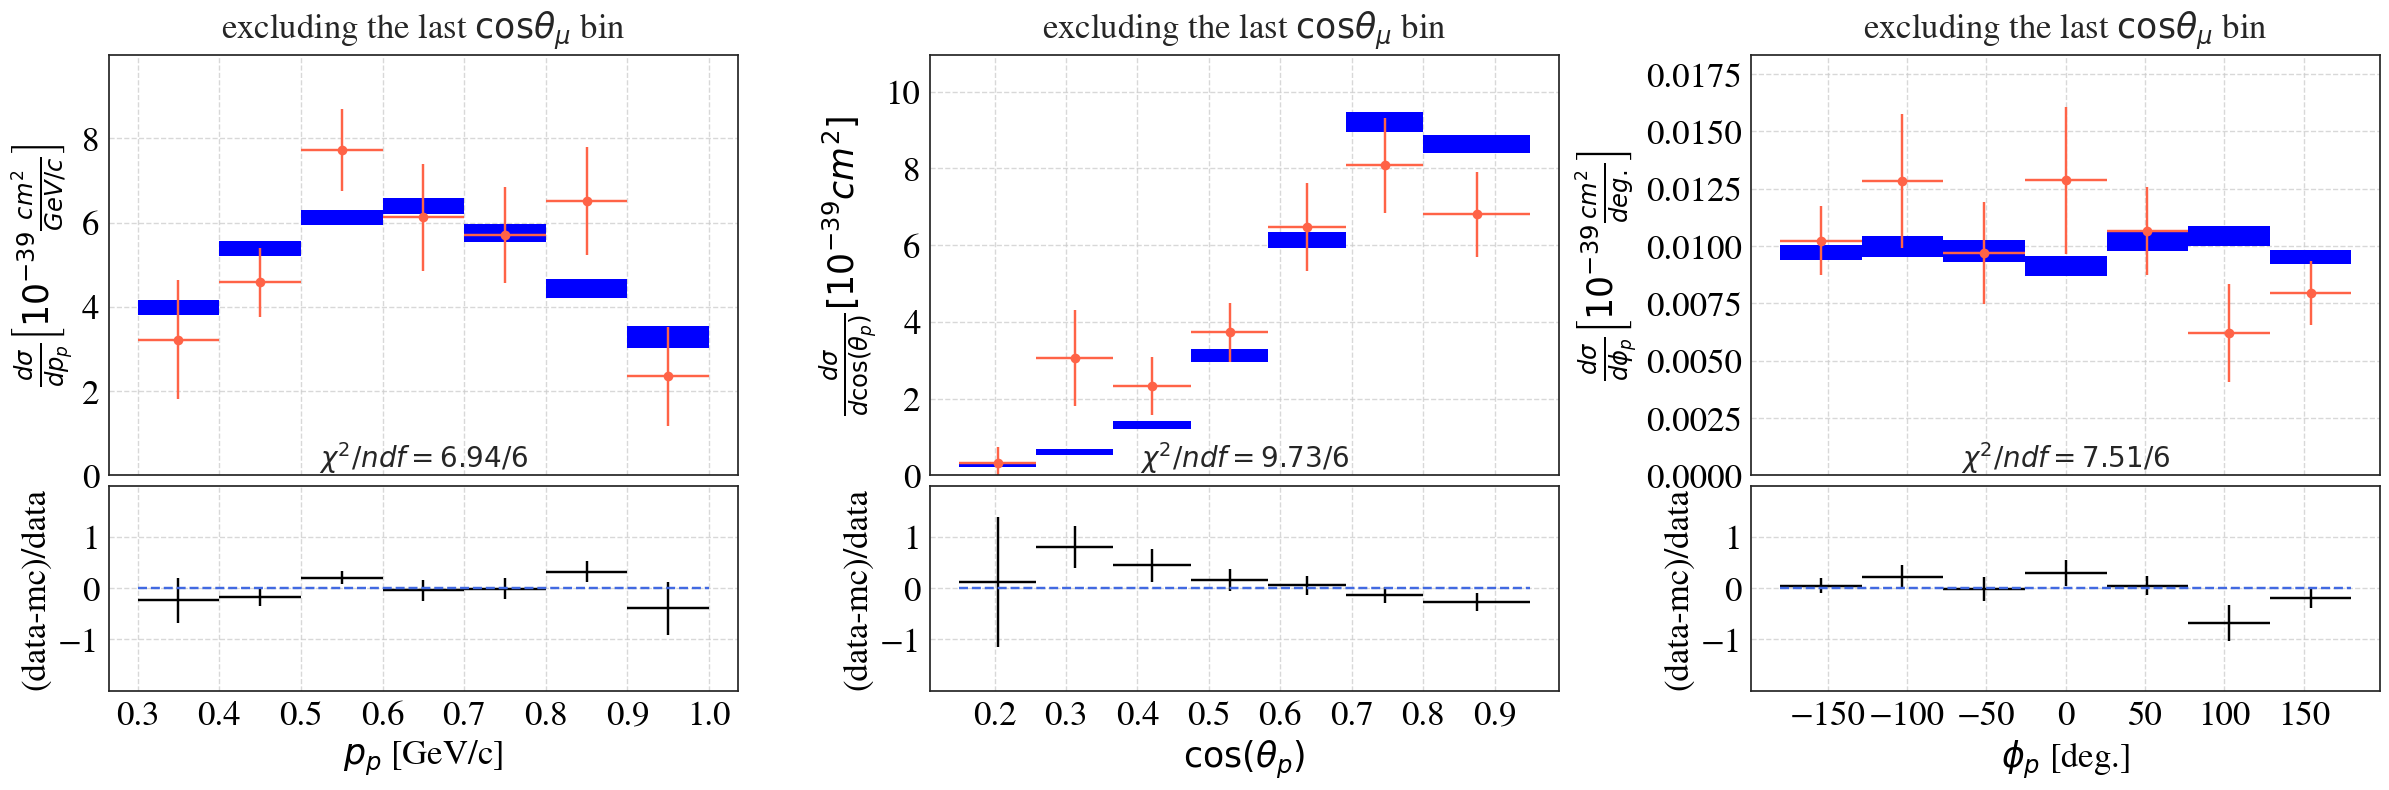

In [7]:
# Draw_Xsecs(particle='mu',debug=0)
Draw_Xsecs(particle='p',debug=0)

# extract the cross-sections for different cut-parameter values

In [8]:
Nrand = 100

for irand in range(Nrand):
    if irand%(Nrand/10)==0: print '%.1f'%(100.*float(irand)/Nrand)+'%'
    Chi2Proton_muCandidate_min = np.random.normal( 80 , 10)
    Chi2Proton_pCandidate_max = np.random.normal( 30 , 5)
    minPEcut = np.random.normal( 150 , 20)
    maxdYZcut = np.random.normal( 200 , 50)
    delta_theta_12 = np.random.normal( 55 , 5 )
    r_max_RdQ_CC1p0pi = np.random.normal( 0.43 , 0.05 )
    delta_Delta_phi = np.random.normal( 35 , 5 )
    Pt_max = np.random.normal( 0.35 , 0.05 )
    print 'Chi2Proton_muCandidate_min,Chi2Proton_pCandidate_max:',Chi2Proton_muCandidate_min,Chi2Proton_pCandidate_max
    extract_Xsec_full_chain(extra_name='VaryAllCuts_%d'%irand,debug=0,force_recalculated_weights=True
                                ,minPEcut = minPEcut,maxdYZcut = maxdYZcut
                                ,delta_theta_12 = delta_theta_12,r_max_RdQ_CC1p = r_max_RdQ_CC1p
                                ,delta_Delta_phi = delta_Delta_phi,Pt_max = Pt_max
                                ,Chi2Proton_muCandidate_min = Chi2Proton_muCandidate_min,Chi2Proton_pCandidate_max = Chi2Proton_pCandidate_max)
    print_line();print_line()

0.0%
Chi2Proton_muCandidate_min,Chi2Proton_pCandidate_max: 66.3858521134 28.4673982819
found selected overlay files from VaryAllCuts_0, loading them...
8789 selected CC1p events overlay
found  434 selected on beam and 11 beam off events...
found selected genie CC1p...
done loading samples...
no efficiency weights, computing them
done assiging efficiency weights weights.
correction for phi(mu)~0: 3.77010311507
correction for phi(p)~0: 2.47058061293
done performing iterative correction for phi~0 and saved the samples...
saved  11231 selected overlay events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_VaryAllCuts_0selected_overlayVaryAllCuts_0.csv
saved  8789 selected CC1p events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_VaryAllCuts_0selected_CC1pVaryAllCuts_0.csv
saved  434 selected beam_on events to /Users/erezcohen/Desktop/

# compute the mean and standard deviations of the cross-sections with different cut parameter values

In [11]:
varying_Xsec = dict()
mean_varying_Xsec,std_varying_Xsec = dict(), dict()

for particle in ['mu','p']:
    varying_Xsec[particle] = dict()
    mean_varying_Xsec[particle] = dict()
    std_varying_Xsec[particle] = dict()

    for iXsec,Xsec_title in enumerate(Xsec_ctu_titles):#{
        varying_Xsec[particle][Xsec_title] = dict()
        mean_varying_Xsec[particle][Xsec_title] = dict()
        std_varying_Xsec[particle][Xsec_title] = dict()
        for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']):#{
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            if iXsec==0 and var=='reco_Pmu_cos_theta': bins=bins[:-1]        
            varying_Xsec[particle][Xsec_title][var] = dict()
            mean_varying_Xsec[particle][Xsec_title][var] = dict()
            std_varying_Xsec[particle][Xsec_title][var] = dict()
            for j_bin in range(len(bins)-1):#{
                varying_Xsec[particle][Xsec_title][var][j_bin] = []
            #}
        #}
    #}
    for irand in range(Nrand):
        extra_name='VaryAllCuts_%d'%irand
        infilename = Paths['1d Xsec'] + "P"+particle + "Xsecs_1D"+extra_name+".txt"
#         print "grabbing cross-section from",infilename
        with open(infilename, 'rb') as infile:#{
            Xsec_dicts = pickle.load(infile)
        #}
        for iXsec,Xsec_title in enumerate(Xsec_ctu_titles):#{
            Xsec_dict = Xsec_dicts[Xsec_title]
            for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']):#{
                var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
                h = dict()
                h['Xsec'] = Xsec_dict[observable]
                h['mc Xsec'] = Xsec_dict['mc '+observable]
                if iXsec==0 and var=='reco_Pmu_cos_theta':
                    bins=bins[:-1];h['Xsec']=h['Xsec'][:-1];h['mc Xsec']=h['mc Xsec'][:-1];
                for j_bin in range(len(bins)-1):
                    varying_Xsec[particle][Xsec_title][var][j_bin].append(h['Xsec'][j_bin])
                #}
            #}
        #}
    #}
    for iXsec,Xsec_title in enumerate(Xsec_ctu_titles):#{
        for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']):#{
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            if iXsec==0 and var=='reco_Pmu_cos_theta': bins=bins[:-1]        
            for j_bin in range(len(bins)-1):
                mean_varying_Xsec[particle][Xsec_title][var][j_bin] = np.mean(varying_Xsec[particle][Xsec_title][var][j_bin])
                std_varying_Xsec[particle][Xsec_title][var][j_bin] = np.std(varying_Xsec[particle][Xsec_title][var][j_bin])
    print 'done',particle

done mu
done p


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/cut_sensitivty_mu_without_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/cut_sensitivty_mu_with_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/cut_sensitivty_p_without_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/cut_sensitivty_p_with_last_ctu_bin.pdf


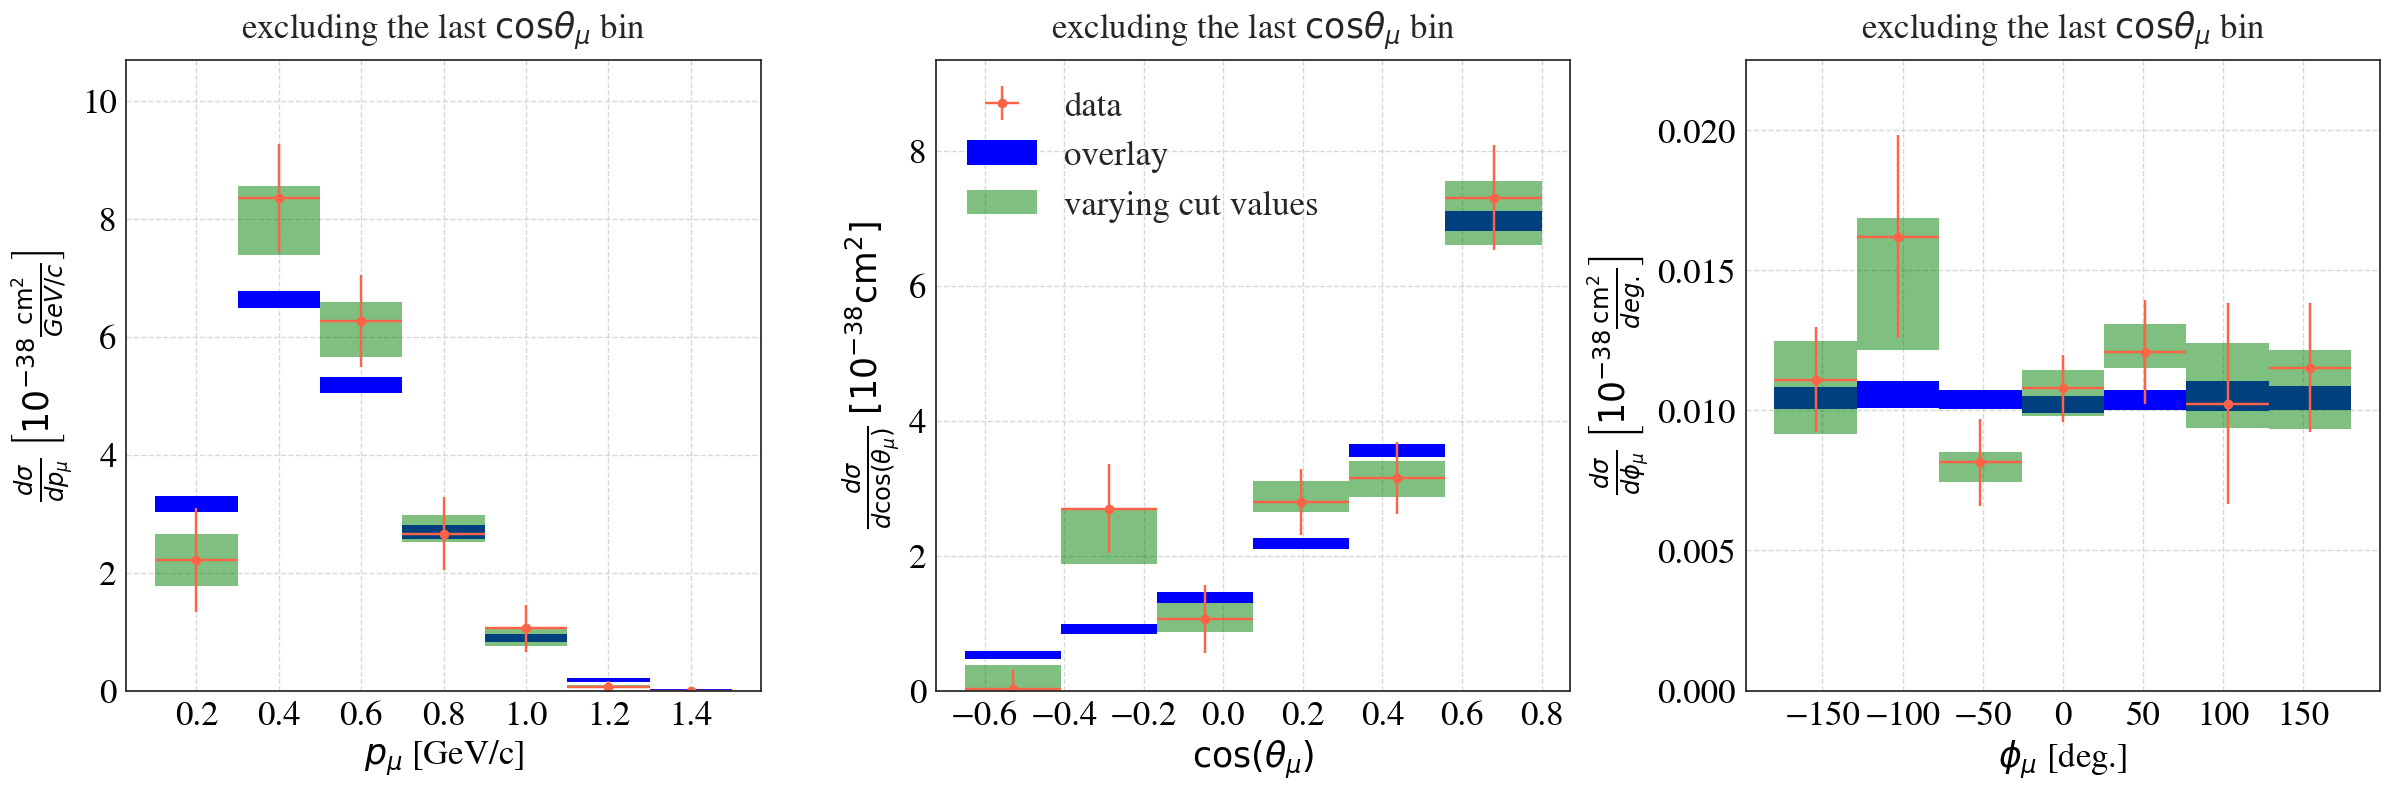

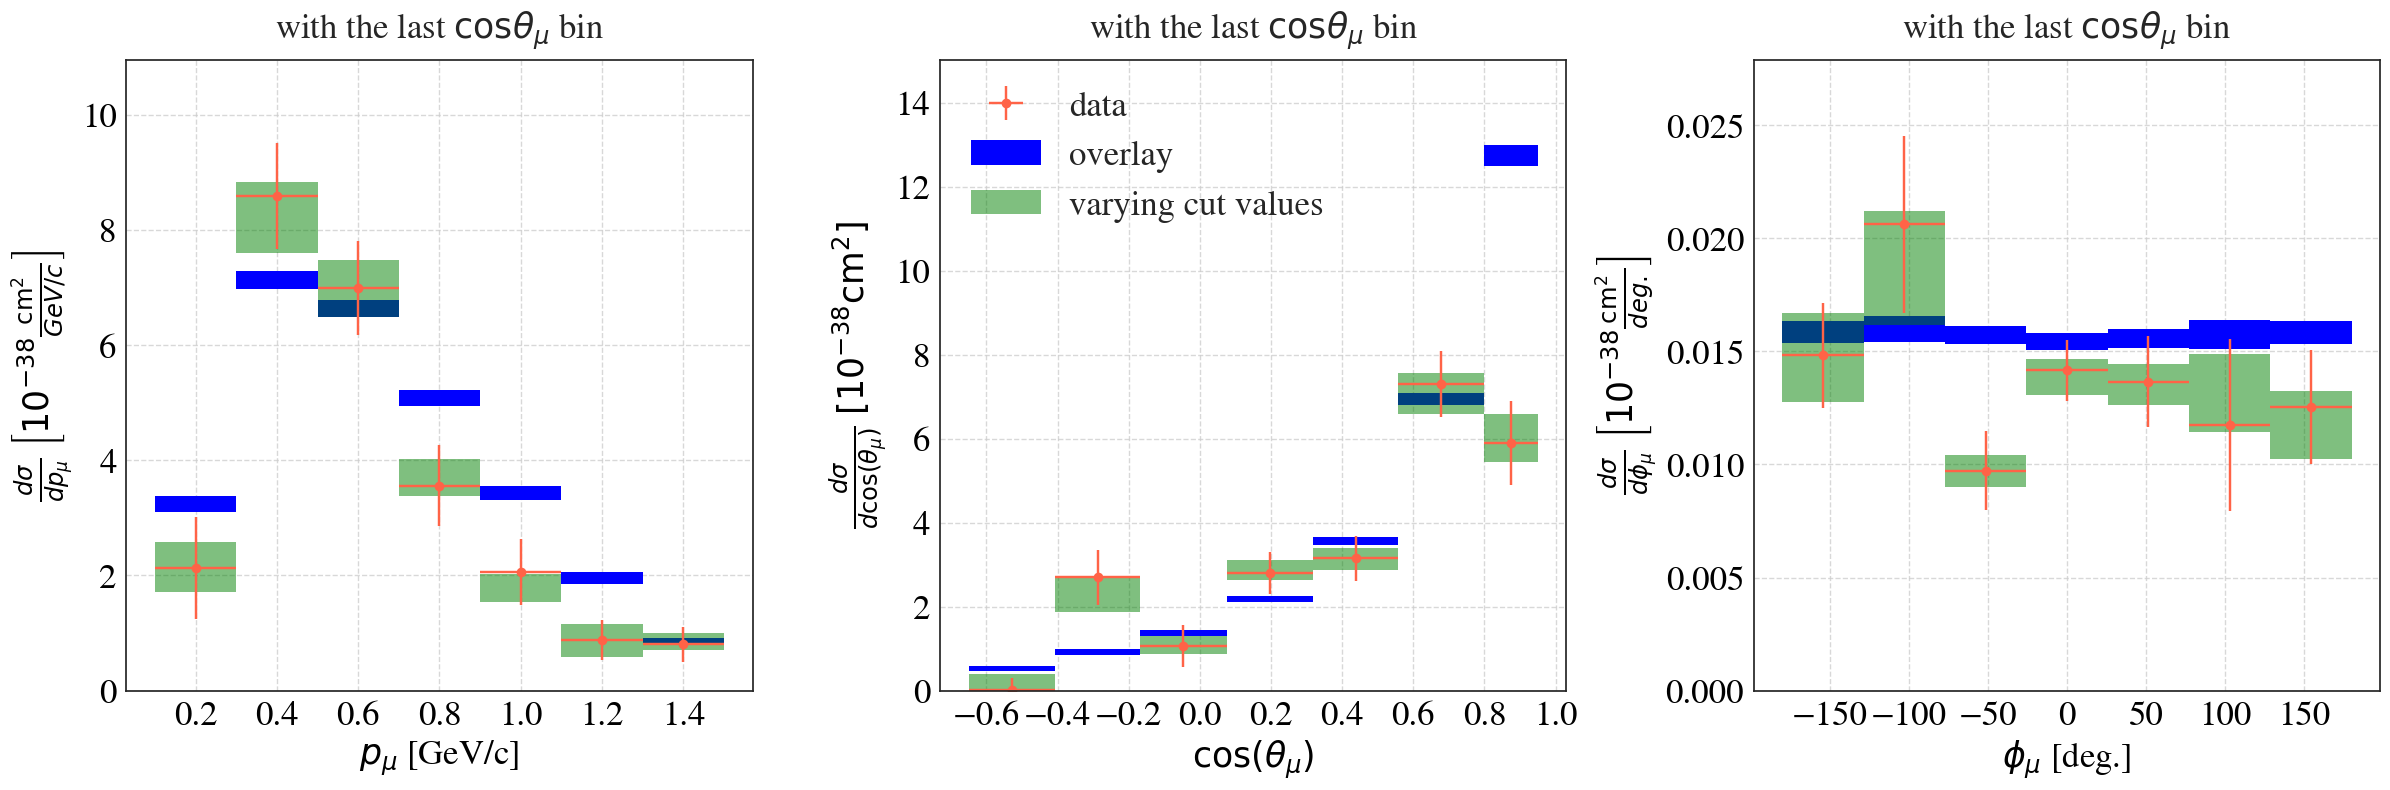

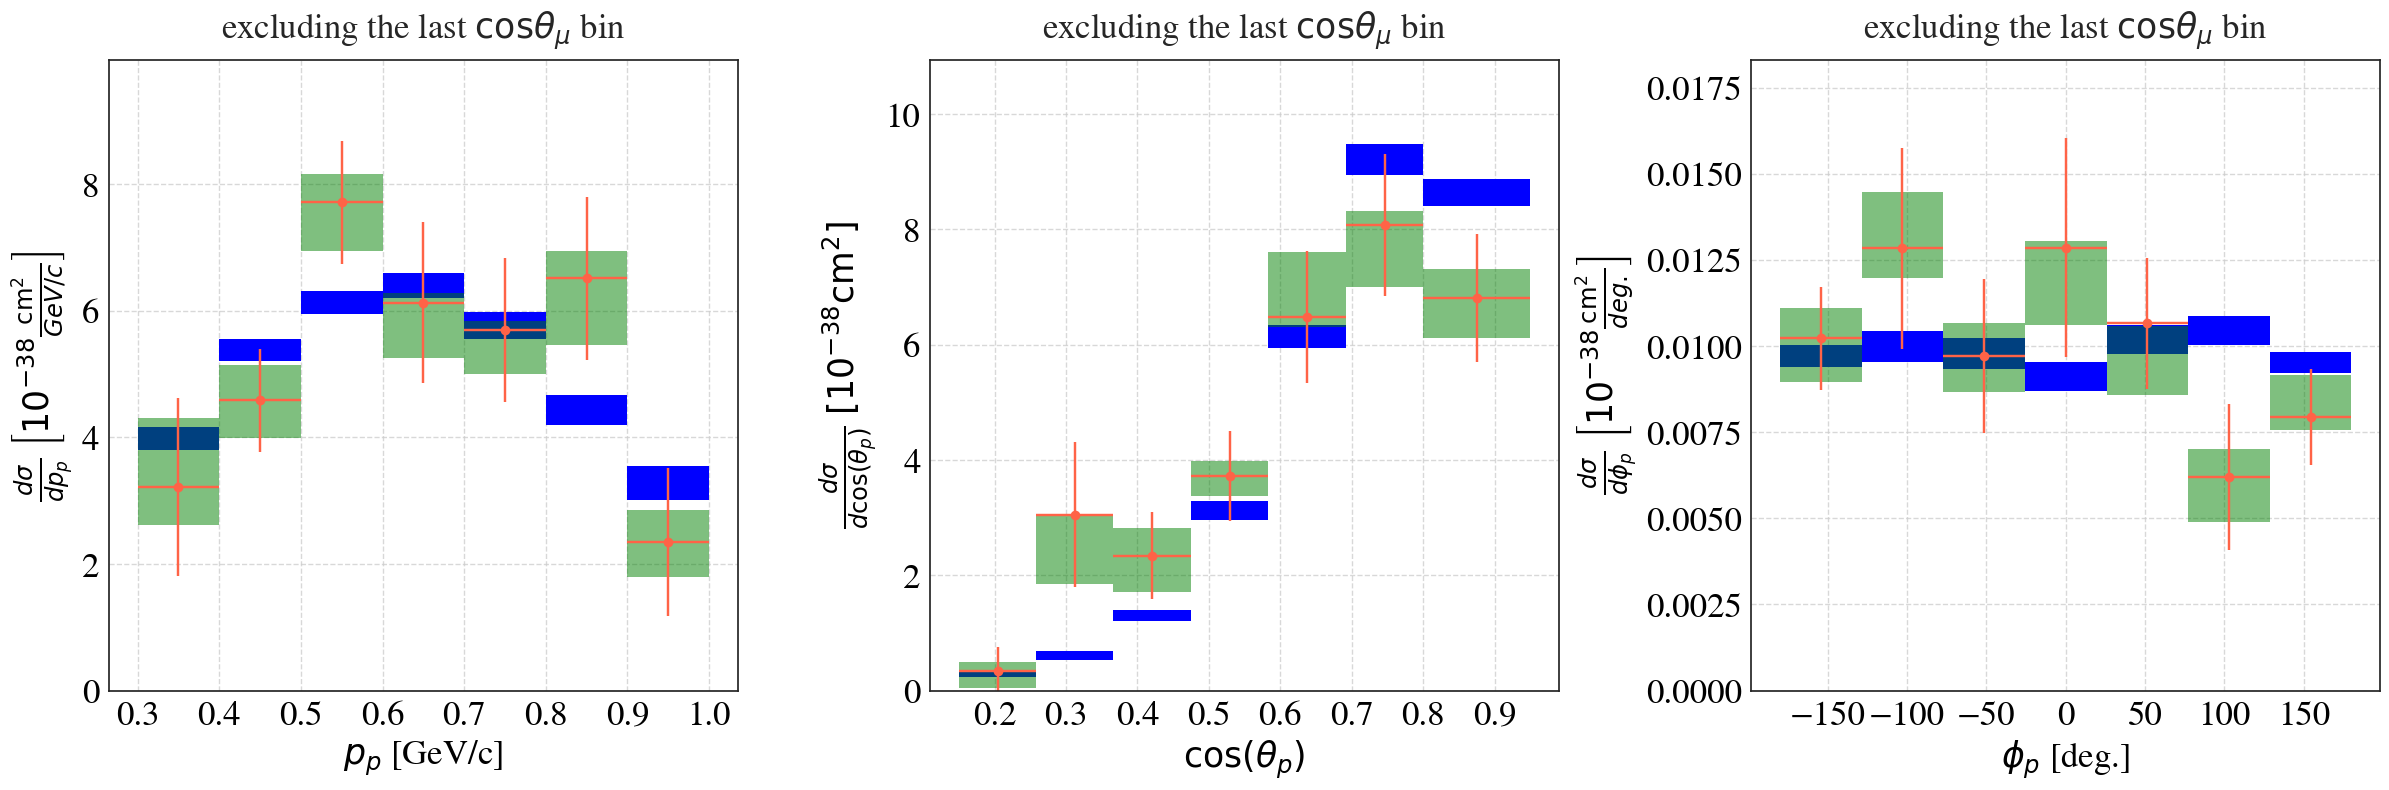

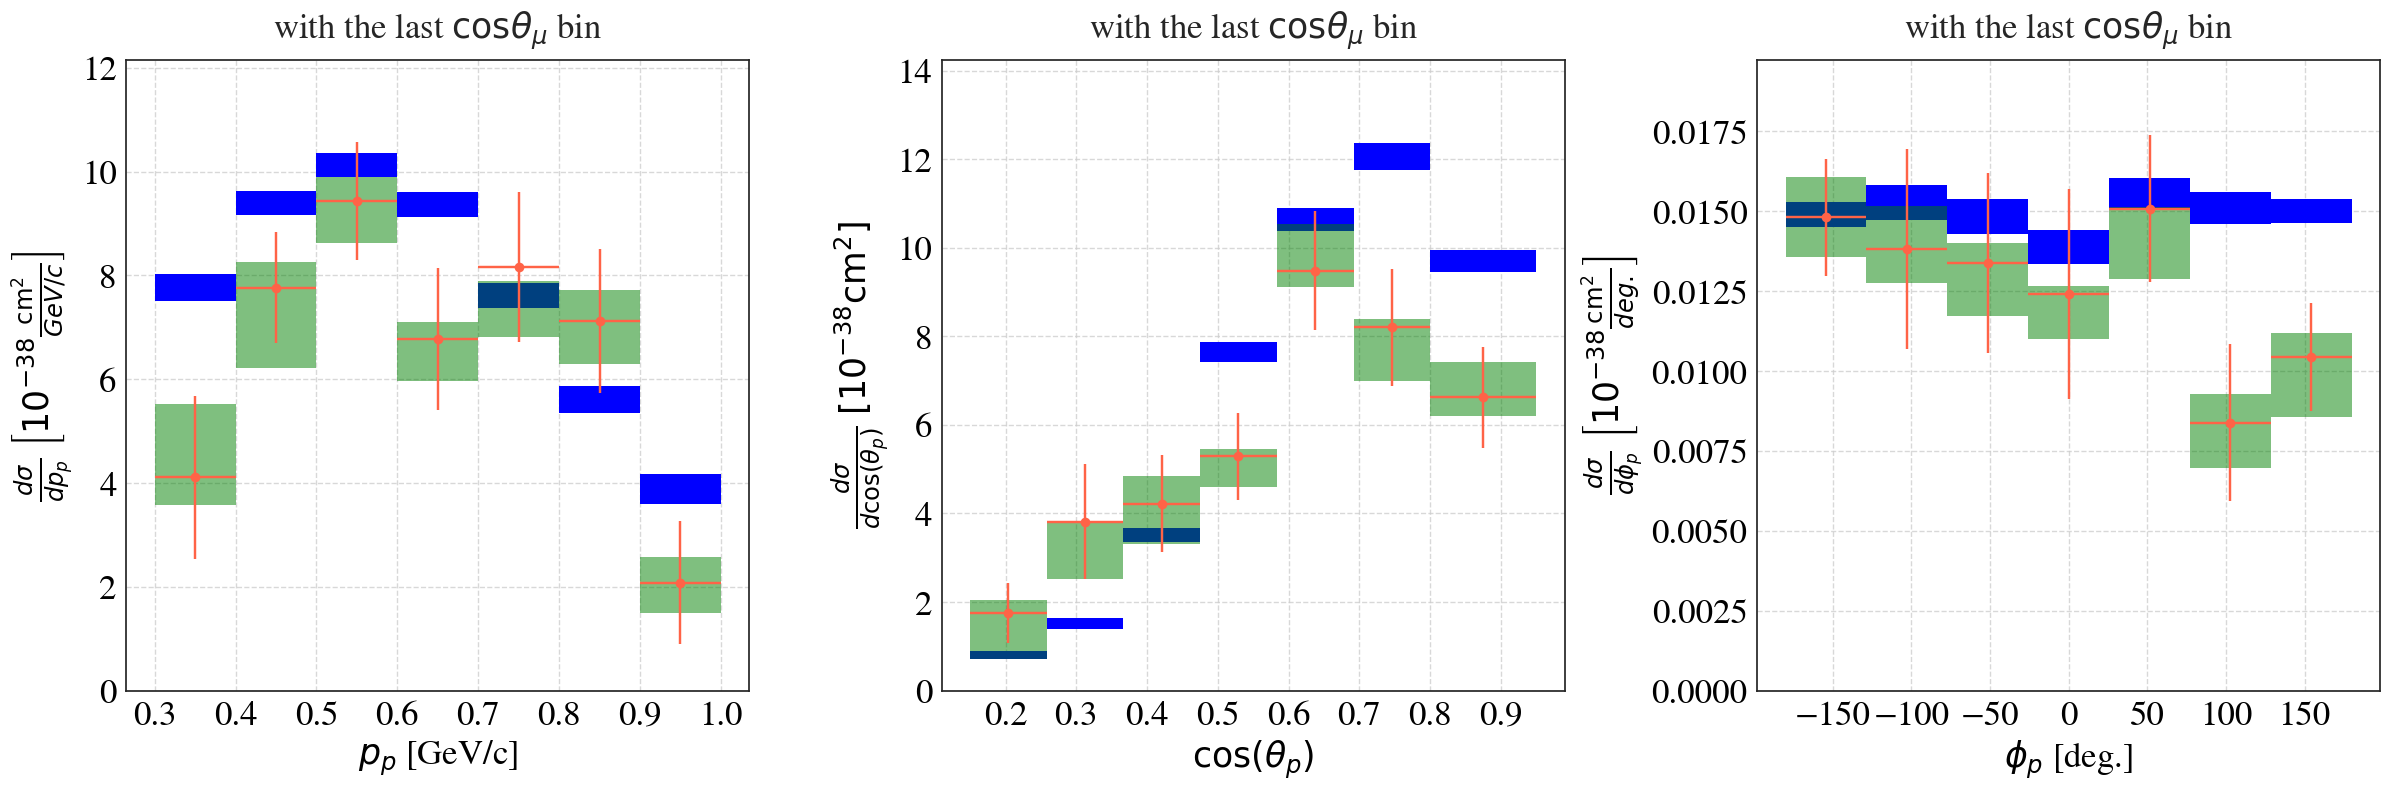

In [14]:
do_last_ctu_bin = True
for particle in ['mu','p']:
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt", 'rb') as infile:#{
        nominal_Xsec_dicts = pickle.load(infile)
    #}
    for iXsec,(Xsec_title,Xsec_fname,do_draw_Xsecs) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames,[True,do_last_ctu_bin])):#{
        if do_draw_Xsecs==False: continue
        fig=plt.figure(figsize=(24,8))            
        Xsec_dict = nominal_Xsec_dicts[Xsec_title]
        for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']):#{
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            h = dict()
            h['Xsec'],h['Xsec err'] = Xsec_dict[observable],Xsec_dict[observable+' err']
            h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+observable], Xsec_dict['mc '+observable+' err']
            ax = fig.add_subplot(1,3,i+1)
            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
                h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]

            plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',label='data')
            ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay') 

            varying_Xsec_avg = np.array(mean_varying_Xsec[particle][Xsec_title][var].values())
            varying_Xsec_std = np.array(std_varying_Xsec[particle][Xsec_title][var].values())
            ax.bar( x=mid , height=2*varying_Xsec_std, bottom=varying_Xsec_avg-varying_Xsec_std, width=bin_width, color='green',label='varying cut values',alpha=0.5)
            set_axes(ax,xlabel,y_label=get_Xsec_label(vlabel,units)
                             ,do_add_grid=True,do_add_legend=True if 'Pmu_cos_theta' in var else False
                             ,ylim=(0,1.1*np.max(ax.get_ylim())))
            plt.title(Xsec_title, y=1.02,fontsize=25)
        plt.tight_layout(h_pad=0)
        save_figure(figures_path + 'cut_sensitivty_'+particle+'_'+Xsec_fname+'.pdf')

In [16]:
Xsec_sys_unc = dict()
for particle in ['mu','p']:
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt", 'rb') as infile: nominal_Xsec_dicts = pickle.load(infile)
    for iXsec,(Xsec_title,Xsec_fname) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames)):#{
        Xsec_dict = nominal_Xsec_dicts[Xsec_title]
        for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']
                                     ):#{
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            h = dict()
            h['Xsec'],h['Xsec err'] = Xsec_dict[observable],Xsec_dict[observable+' err']
            h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+observable], Xsec_dict['mc '+observable+' err']
            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
                h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]
                
            varying_Xsec_avg = np.array(mean_varying_Xsec[particle][Xsec_title][var].values())
            varying_Xsec_std = np.array(std_varying_Xsec[particle][Xsec_title][var].values())            
            Xsec_sys_unc[var + Xsec_fname + ' Xsec sys. err up'] = (varying_Xsec_avg + varying_Xsec_std) - h['Xsec']
            Xsec_sys_unc[var + Xsec_fname + ' Xsec sys. err dw'] = h['Xsec'] - (varying_Xsec_avg - varying_Xsec_std )

In [17]:
outfilename = Paths['systematics'] + "cut_sensitivty_systemaitcal_uncertainty.txt"
with open(outfilename, 'w') as outfile:
    outfile.write(pickle.dumps(Xsec_sys_unc))
print 'saved',outfilename

saved /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/systematics/cut_sensitivty_systemaitcal_uncertainty.txt


In [18]:
with open(Paths['systematics'] + "cut_sensitivty_systemaitcal_uncertainty.txt", 'rb') as infile: 
    Xsec_sys_unc = pickle.load(infile)
Xsec_sys_unc

{'reco_Pmu_cos_thetawith_last_ctu_bin Xsec sys. err dw': array([ 0.13895458,  0.82813527,  0.19125934,  0.1579688 ,  0.2865816 ,
         0.7075241 ,  0.44175497]),
 'reco_Pmu_cos_thetawith_last_ctu_bin Xsec sys. err up': array([ 0.36007179, -0.02451835,  0.23425807,  0.29871698,  0.24446792,
         0.25010808,  0.70308176]),
 'reco_Pmu_cos_thetawithout_last_ctu_bin Xsec sys. err dw': array([ 0.13895458,  0.82813527,  0.19125934,  0.1579688 ,  0.2865816 ,
         0.7075241 ]),
 'reco_Pmu_cos_thetawithout_last_ctu_bin Xsec sys. err up': array([ 0.36007179, -0.02451835,  0.23425807,  0.29871698,  0.24446792,
         0.25010808]),
 'reco_Pmu_mcs_phiwith_last_ctu_bin Xsec sys. err dw': array([ 0.00206374,  0.0044522 ,  0.00072749,  0.0011062 ,  0.00100696,
         0.0002851 ,  0.00229473]),
 'reco_Pmu_mcs_phiwith_last_ctu_bin Xsec sys. err up': array([ 0.00185649,  0.00056501,  0.00068857,  0.00051185,  0.00078882,
         0.00313352,  0.00071025]),
 'reco_Pmu_mcs_phiwithout_last_ctu